https://www.kaggle.com/datasets/roopacalistus/superstore

# 1) Business Understanding

#2) Data Understanding

In [ ]:
import pandas as pd

# Carregando o dataset enviado pelo usuário
file_path = '/content/SampleSuperstore.csv'
df = pd.read_csv(file_path)

In [ ]:
# **2. Entendimento dos Dados**
print("\nPrimeiros 5 registros do dataset:")
print(df.head())

print("\nInformações sobre o dataset:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe())

# Verificando valores únicos em colunas relevantes
print("\nRegiões únicas:")
print(df['Region'].unique())

print("\nCategorias únicas:")
print(df['Category'].unique())


Primeiros 5 registros do dataset:
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.

# 3) Data Preparation

In [ ]:
# **3. Preparação dos Dados**

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Criar uma nova coluna: Lucro por Unidade
df['Profit_per_Unit'] = df['Profit'] / df['Quantity']

# Remover duplicatas (se existirem)
df.drop_duplicates(inplace=True)


Valores ausentes por coluna:
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


# 4) Modeling

In [ ]:
# **4. Modelagem**

# 1. Lucro por região
lucro_por_regiao = df.groupby('Region')['Profit'].sum()
print("\nLucro por Região:")
print(lucro_por_regiao)

# 2. Efeito dos descontos no lucro
desconto_lucro = df.groupby('Discount')['Profit'].mean()
print("\nEfeito do desconto no lucro:")
print(desconto_lucro)

# 3. Categorias mais lucrativas
lucro_por_categoria = df.groupby('Category')['Profit'].sum()
print("\nLucro por Categoria:")
print(lucro_por_categoria)

# 4. Subcategorias mais lucrativas
lucro_por_subcategoria = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
print("\nTop Subcategorias mais lucrativas:")
print(lucro_por_subcategoria.head(5))


Lucro por Região:
Region
Central     39655.8752
East        91506.3092
South       46749.4303
West       108329.8079
Name: Profit, dtype: float64

Efeito do desconto no lucro:
Discount
0.00     67.024108
0.10     96.055074
0.15     27.288298
0.20     24.721217
0.30    -45.828401
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -102.116395
Name: Profit, dtype: float64

Lucro por Categoria:
Category
Furniture           18421.8137
Office Supplies    122364.6608
Technology         145454.9481
Name: Profit, dtype: float64

Top Subcategorias mais lucrativas:
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          33944.2395
Binders        30228.0003
Name: Profit, dtype: float64


# **5. Avaliação**
 Insights preliminares:
 - Regiões mais lucrativas
 - Impacto do desconto no lucro
 - Produtos que mais geram lucro

# 6) Deployment


Resultados exportados para arquivos CSV!


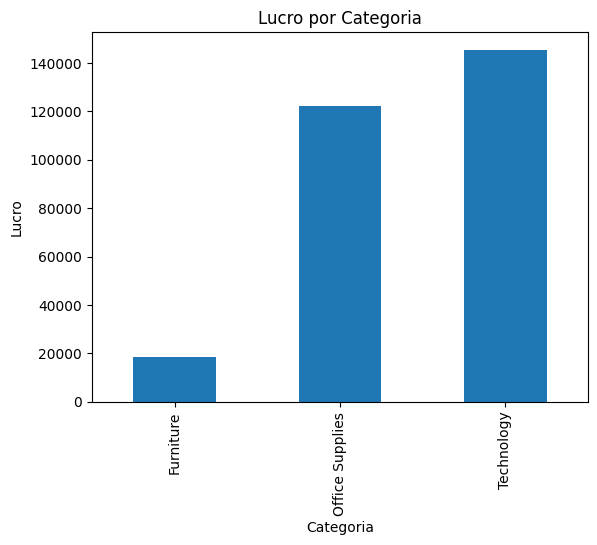

<Axes: title={'center': 'Impacto do Desconto no Lucro'}, xlabel='Desconto', ylabel='Lucro Médio'>

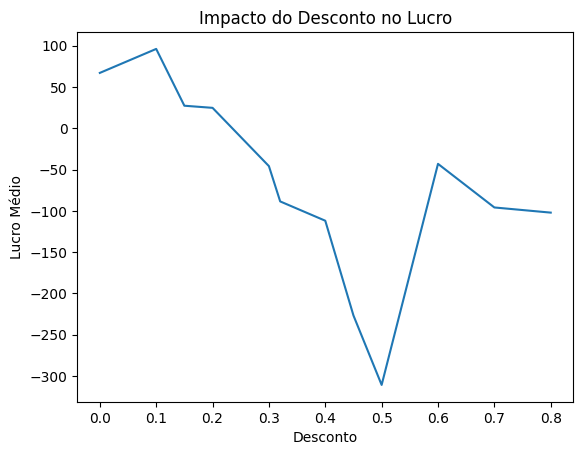

In [ ]:
# **6. Implantação**

# Exportando os resultados para CSV
lucro_por_regiao.to_csv('/content/lucro_por_regiao.csv', index=True)
lucro_por_categoria.to_csv('/content//lucro_por_categoria.csv', index=True)
lucro_por_subcategoria.to_csv('/content/lucro_por_subcategoria.csv', index=True)

print("\nResultados exportados para arquivos CSV!")

# Criando um gráfico simples para visualização (opcional)
import matplotlib.pyplot as plt

# Gráfico de lucros por categoria
lucro_por_categoria.plot(kind='bar', title='Lucro por Categoria', ylabel='Lucro', xlabel='Categoria')
plt.show()

# Gráfico de descontos versus lucro
desconto_lucro.plot(kind='line', title='Impacto do Desconto no Lucro', ylabel='Lucro Médio', xlabel='Desconto')